## Treinamento
***

Aqui será mostrado como treinar um algoritmo para detectar um objeto específico, no caso será canecas.

```
sudo apt-get install python-opencv
sudo apt-get install libopencv-dev
```

***
### Processo de criação de um arquivo XML treinado
***

**1)** Escolher um objeto para detecção, carro, pessoas, faces, etc...

* Definir se é um objeto mais rígido (como uma logo) ou com grandes variações (cadeiras, copos, celulares e etc...)


* Quanto mais rígido o objeto for mais fácil é treina-lo, já objetos que possuem uma quantidade muito grande de variações vão exigir uma grande quantidade de imagens para o treinamento.


* Ao treinar tantas variações pode ser que o classificador fique mais fraco como um todo.


* Objetos que a cor é um fator fundamental para diferenciar também não são recomendados, já que elas serão transformadas em escala de cinza

**2)** Selecionar as imagens negativas, ou seja, imagens que não são o objeto escolhido.

* São imagens que não contém o objeto a ser reconhecido.


* De preferência devem ser maiores que as imagens positivas, especialmente se vão ser criadas amostras.


* Pode ser fotos de qualquer outra coisa, por exemplo, se a gente ta detectando canecas, podemos usar imagens de uma praia que não tem nada a ver com canecas.


* Pode ser interessante ter fotos de prováveis fundos do objeto a ser detectado, por exemplo, se a gente quer detectar carros, podemos colocar fotos de pistas, rodovias sem carros e etc.


* Deve ter muito mais imagens negativas do que positivas.

**3)** Selecionar imagens positivas, ou seja, imagens que contêm o objeto que deseja detectar.

* Temos que ter fotos de todas as perspectivas de visão do objeto, por exemplo, lado, frente, trás, cima e etc...


* A quantidade de imagens a ser utilizada dependo do tipo do objeto a ser reconhecido, da qualidade das imagens, poder computacional disponível.


* Definir um tamanho único para todas as imagens, é recomendado que o maior lado não ultrapasse 30px para não levar muito o tempo de treinamento.


* A proporção precisa ser a mesma para todas as imagens, caso contrário o OpenCV redimensionará automaticamente, o que pode não ser o ideal. Ideial, 1:1 (25x25), 1:2 (10x20), 2:1 (20x10) e por ai vai... por exemplo, imagens de carros de frente e de lado são quadradas (1:1) já as de carros de lado tem proporção 1:2, ou seja, tem uma largura maior que a altura.


* O ideal é que as imagens tenha a mesma proporção 1:1 já que na etapa de preparação de treinamento todas serão redimensionadas para ter o mesmo tamanho. Se elas tiverem a mesma proporção não haverá problemas, mas se tiver imagens retangulares o OpenCV irá achatar ou alongar a imagem, descaracterizando ela. A solução é criar 2 classificadores distintos, um para imagens com a mesma proporção e outras para imagens retangulares.


* Caso seja necessário treinar com imagens maiores para captar muitos detalhes o processamento pode chegar a levar dias ou semanas.


* As imagens positivas devem estar de acordo com o objetivo do classificador, por exemplo, se for um pedestre as imagens deve ser posicionadas como se o pedestre tivesse vendo, já uma câmera de segurança as imagens são vistas de cima, diferente do pedestre.

**4)** Gerar vetor das imagens positivas, quando gerar o haarcascade, o algoritmo vai pegar as imagens positivas e combinar com as imagens negativas.

**5)** Treinamento do classificador (cascade)

* O tempo de treinamento está relacionada ao tamanho da imagem, quanto maior o tamanho mais tempo vai demorar


* Quanto mais imagens positivas e negativas mais ele vai demorar, porém o desempenha será melhor.


* A quantidade de estágios de treinamento, a quantidade de memória disponível e a quantidade de processamento da máquina tb influencia no tempo.

***
### Pré processamento das imagens
***

Para que se possa usar imagens negativas e positivas temos que deixa-las otimizadas o suficiente para o treinamento.

Para o tratamento das imagens podemos utilizar softwares para edição de imagens, como GIMP ou Photoshop ou usar o próprio OpenCV para tratar a imagem.

* Dar preferências para imagens que o fundo esteja totalmente branco e com iluminação para identificar bem o objeto.

* Imagens que contenham somente um objeto, pois assim não será necessário realizar outros pré-processamentos.

Se as imagens forem únicas do objeto que queremos identificar, por exemplo, uma imagem de uma caneca com fundo branco, podemos usar os scripts: **preparar_imagem.py** e **montar-positivas.py**.

Caso as imagens tenham outros objetos nela além do objeto que queremos identificar, após usar o script **preparar_imagem.py** temos que usar um comando especifico do OpenCV:

```
opencv_annotation --images=positivas_final/ --annotations=positivas.lst 
```

Ele irá abrir cada uma das imagens para você marcar os retangulos com o clique do mouse e rastando ele até selecionar o objeto que você quer e clica de novo, utilizando a tecla 'c' para aceitar a seleção, 'd' para deletar, 'n' para ir para a próxima imagem e 'esc' para parar.

***
### Comandos para gerar o treinamento
***

Vamos criar imagens positivas que já terão como fundo imagens negativas, usado normalmente quando se tem poucas imagens positivas.

No terminal execute:

* **img**: Parâmetro para especificar a imagem positiva que irá gerar as outras imagens positivas de amostra.
* **bg**: Arquivo.txt com o caminho para todas a imagens negativas
* **info**: Arquivo.lst que terá as informações de todas as imagens positivas geradas. (nome da imagem, qtd de objetos, x, y, largura, altura do objeto na imagem)
* **maxxangle**: Faz transformações de rotação no eixo X
* **maxyangle**: Faz transformações de rotação no eixo Y
* **maxzangle**: Faz transformações de rotação no eixo Z
* **num**: Quantidade de imagens que será gerada dessa única imagem positiva.
* **w**: Largura da dimensão da imagem que será mesclada nas negativas
* **h**: Altura da dimensão da imagem que será mesclada nas negativas
* **bgcolor**: Quando encontrar a cor branca (255) em uma imagem positiva ele vai deixar transparente
* **bgthresh**: Determina a quantidade de tolerância que a cor no parâmetro bgcolor tem para ser transformada em transparente

```
opencv_createsamples -img imagem_positiva.jpg -bg negativas/bg.txt -info positivas/positivas.lst -maxyangle 0.5 -maxxangle 0.5 -maxzangle 0.5 -num 1800 -bgcolor 255 -bgthresh 8
```

Se tivermos mais imagens positivas é só rodar o comando acima para cada imagem positiva encontrada, por exemplo, imagens em angulos diferentes ou com variações. Mudando os parametros de img, info modificando o nome da pasta e do arquivo.

#### Para criar o vetor usamos o mesmo método:

* **info**: Arquivo.lst que terá as informações de todas as imagens positivas geradas. (nome da imagem, qtd de objetos, x, y, largura, altura do objeto na imagem)
* **num**: Quantidade de imagens que será usada no treinamento.
* **w**: Largura da dimensão das imagens que queremos fazer o treinamento
* **h**: Altura da dimensão das imagens que queremos fazer o treinamento
* **vec**: Nome do arquivo com o vetor que usaremos para criar o treinamento

```
opencv_createsamples -info positivas/positivas.lst -num 1800 -w 48 -h 48 -vec positivas.vec
```

Se tiver várias pastas de imagens positivas terá que criar um arquivo.vec para cada pasta, insira tudo em uma pasta chamada vec e depois usar um script para juntas os .vec em um único.

Script: https://github.com/wulfebw/mergevec

```
python mergevec.py -v vec/ -o positivas.vec
```

#### Vamos gerar o arquivo de treinamento.xml (cascade.xml)

* **data**: É onde ficará os dados do treinamento (xml)
* **vec**: Arquivo.vec com o vetor treinado
* **bg**: Lista das imagens negativas em txt
* **numPos**: Número de imagens positivas, nunca use o valor total de imagens, sempre insira $total x 0.09$ imagens, para caso o algoritmo precise usar mais imagens durante o treinamento não der erro por falta de imagens.
* **numNeg**: Número de imagens negativas, colocar sempre a metade das positivas
* **numStages**: Número de estágios para executar o classificador, quanto mais estágios mais caracteristicas
* **w**: Largura da dimensão das imagens que queremos fazer o treinamento
* **h**: Altura da dimensão das imagens que queremos fazer o treinamento
* **precalcValBufSize**: Indica o tamanho do buffer para ele armazenar as características haar que ele encontrar.
* **precalcIdxBufSize**: Indica o tamanho do buffer para ele armazenar os índices das características haar que ele encontrar.

Quanto mais memória atribuir mais rápido o processo de treinamento, porém o precalcValBufSize + precalcIdxBufSize deve ser menor que a memória total disponível no sistema.

```
opencv_traincascade -data classificador -vec positivas.vec -bg negativas/bg.txt -numPos 1600 -numNeg 3200 -numStages 10 -w 48 -h 48 -precalcValBufSize 1024 -precalcIdxBufSize 1024
```

* **N**: É a quantidade de caracteristicas encontradas em cada estágio
* **HR**: É o valor de acerto 1 = 100% para essa caracteristica, ou seja, percentual de amostras positivas, tem que ser valores grandes
* **FA**: É o valor de erro 1 = 100% para essa caracteristica, ou seja, percentual de amostrar negativas ou incorretamente classificadas para essa caracteristicas, tem que ser valores pequenos

***
### Exemplo
***

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
# Cria um classificador passando o xml haarcascade treinado
classificador = cv.CascadeClassifier("./classificador/cascade.xml")

In [3]:
# Armazena a imagem e coloca ela em tons de cinza
img = cv.imread("./imagens/caneca2.jpg")
imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagem_cinza = cv.cvtColor(imagem_colorida, cv.COLOR_RGB2GRAY)

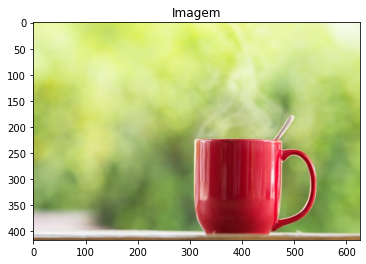

In [4]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem")
plt.show()

In [5]:
# Armazena todas as faces detectadas (matriz) pela imagem passada
objetos_detectados = classificador.detectMultiScale(imagem_cinza)
print("Foi identificado " + str(len(objetos_detectados)) + " objetos.")
print(objetos_detectados) # [x, y, largura, altura] da face (retangulo)

Foi identificado 1 objetos.
[[327 326  24  24]]


In [6]:
retangulo_cor = (0, 0, 255) # rgb
tamanho_borda = 2
for (x, y, largura, altura) in objetos_detectados:
    cv.rectangle(imagem_colorida, (x, y), (x + largura, y + altura), retangulo_cor, tamanho_borda)

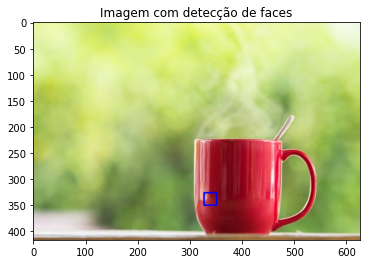

In [7]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem com detecção de faces")
plt.show()

***
### Melhorias
***

* Não há uma regra sobre a quantidade de imagens positivas ou negativas


* **Primeiro teste**: utilizar o dobro de positivas em relação as negativas.


* Se houver muitos **falsos positivos** (detecta o objeto na imagem, porém é o objeto que queremos), tem que aumentar o número de imagens negativas.


* Se houver muitos **falsos negativos** (Quando não acha o objeto que queremos, mesmo ele existindo ali), tem que adicionar mais imagens positivas ou ajustar os parâmetros.


* Para um classificador mais robusto você deve coletar imagens manualmente e em vários cenários, ou seja, não irá gerar as imagens positivas pelo método **opencv_createsamples**.


* Para objetos mais rígidos como logos, pode-se usar somente o método **opencv_createsamples**.


* Ao aumentar o número de imagens positivas vai aumentar a generalização do modelo (melhores características que descrevem o objeto) com isso em imagens nas quais o objeto está um pouco diferente do modelo treinado o algoritmo tem mais chances para encontrar o objeto.


* Isso irá evitar o sobreajuste (overfitting) do modelo, que ocorre quando o modelo se ajusta tão bem a esse conjunto de imagens de treinamento, mas é ineficaz para prever novos resultados.


* Caso use os parâmetros abaixo o tempo de treinamento pode ficar extremamente lento, principalmente quando começa a chegar nos últimos estágios. Caso o número de imagens positivas e/ou negativas seja maior que 5000 o treinamento poderá levar dias ou até mesmo semanas.


* O número ideal para o aprendizado de máquina é 5000 imagens positivas e negativas.


* O **haarcascade** executa rápido podendo usar em webcans, é recomendável para objetos com pouca variação (logos) com poucas imagens para treinamento. Não é recomendado para objetos muito variados e com cor determinantes.


* **Outras técnicas**: HOG + SVM (Dlib), Redes neurais convolucionais dentro da área de deep learning.

***
### Parâmetros adicionais
***

* **-minHitRate 0.999**: É o HR do treinamento, ou seja, é a taxa de acerto mínima desejada para cada estágio do classificador, quanto mais perto do 1 melhor. Valor padrão é 0.995.


* **-maxFalseAlarmRate 0.1**: É o FA do treinamento, ou seja, é a taxa máxima de alarme falso desejado para cada estágio do classificador, é a definição de quantos recursos/caracteristicas precisam ser adicionadas, é as imagens que ele detectou, porém não era a que queriamos. Quanto mais perto do 0 melhor e o padrão é 0.5, ou seja, é aplicado um palpite aleatório.


* **-maxWeakCount 1000**: É a quantidade de classificadores fracos que ele vai gerar, quanto maior o valor melhor.


* **-inv**: Inverte a cor da imagem, se for preta vira branca e vise-versa


* **-randinv**: Inverte randomicamente a cor da imagem, ou seja, algumas estarão na cor original e outras na cor invertida.

